In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funciones import cargar_muestras_paciente, explorar_directorio
from sklearn.decomposition import PCA

In [2]:
df_indices= pd.read_csv(("Archivos Prueba Piloto TEST (ARCHIVOS ALT)/Balbuena1PRE.csv") , encoding='latin1')
indices = df_indices.columns
print(indices)

Index(['Identificación del Equipo', 'Dia del Análisis', 'Hora de Análisis',
       'N' de Rack', 'Posición del tubo', 'No de Muestra', 'Info de Muestra',
       'Modo de Análisis', 'ID del paciente', 'Ana. Info.',
       ...
       'Qflag(Linf. Atíp.?)', 'Qflag(NRBC?)', 'Qflag(Linf.An/Blas?)',
       'Qflag(Agluti. RBC?)', 'Qflag(Turb/HGB?)', 'Qflag(Déf. Hierro?)',
       'Qflag(Defecto HGB?)', 'Qflag(Fragmentos?)', 'Qflag(Agreg. PLT?)',
       'Qflag(PLT Grandes?)'],
      dtype='object', length=152)


In [3]:
df1 , df2 , df3 = pd.DataFrame(columns = indices), pd.DataFrame(columns = indices), pd.DataFrame(columns = indices)


In [4]:
directorio = '/home/martina/Escritorio/PID/notebooks/Archivos Prueba Piloto TEST (ARCHIVOS ALT)'
lista_archivos = explorar_directorio(directorio)

#df = pd.read_csv(('/content/drive/My Drive/2024/PID/df_pacientes_copia.csv') , encoding='utf-8')

#df1 = pre; df2: prp1 (pre-frio) ; df3: prp2 (post-frio)
cargar_muestras_paciente(df1, df2, df3, directorio)
df1.head()

,Identificación del Equipo,Dia del Análisis,Hora de Análisis,N' de Rack,Posición del tubo,No de Muestra,Info de Muestra,Modo de Análisis,ID del paciente,Ana. Info.,...,Qflag(Linf. Atíp.?),Qflag(NRBC?),Qflag(Linf.An/Blas?),Qflag(Agluti. RBC?),Qflag(Turb/HGB?),Qflag(Déf. Hierro?),Qflag(Defecto HGB?),Qflag(Fragmentos?),Qflag(Agreg. PLT?),Qflag(PLT Grandes?)
BAL 23/11/2023,XS-1000i^74612,23/11/2023,09:20:43,8.0,10,1Pre,A,Muestreador,BAL,Normal,...,0,20,10,70,90,80,80,0,10,20
BAL 07/12/2023,XS-1000i^74612,07/12/2023,09:03:44,6.0,9,2PRE,A,Muestreador,BAL,Normal,...,0,10,0,70,90,80,80,0,10,10
BAL 21/12/2023,XS-1000i^74612,21/12/2023,09:03:17,NaN,0,3PRE,M,Manual,BAL,Normal,...,0,0,0,70,80,80,80,0,20,20
COL 23/11/2023,XS-1000i^74612,23/11/2023,09:19:27,8.0,9,1PRE,A,Muestreador,COL,Normal,...,20,0,0,60,90,80,80,0,10,30
COL 07/12/2023,XS-1000i^74612,07/12/2023,10:50:58,12.0,10,2PRE,A,Muestreador,COL,Normal,...,10,0,0,60,90,80,80,0,60,30


In [5]:
columnas_aelim = df1.select_dtypes(exclude=['number']).columns.tolist()
columnas_aelim += df1.columns[df1.isna().any()].tolist()
columnas_aelim.append("Posición del tubo")
columnas_aelim += [col for col in df1.columns if col.startswith("Mensaje de Acción")]
df_subset = df1[columnas_aelim]

df_cleaned = df1.copy()
df_cleaned.drop(columnas_aelim, axis=1, inplace=True)


indice_inic = df_cleaned.columns.get_loc("WBC(10/uL)")
indice_fin = df_cleaned.columns.get_loc("WBC-D(10/uL)")
df_filtrado = df_cleaned.iloc[:, indice_inic:indice_fin+1]

df_filtrado.head()




,WBC(10/uL),RBC(10^4/uL),HGB(g/L),HCT(10^(-1)%),MCV(10^(-1)fL),MCH(10^(-1)pg),MCHC(g/L),PLT(10^3/uL),RDW-SD(10^(-1)fL),RDW-CV(10^(-1)%),...,IG#(10/uL%),IG%(10^(-1)%),NEUT#&(10/uL%),NEUT%&(10^(-1)%),LYMPH#&(10/uL),LYMPH%&(10^(-1)%),OTHER#(10/uL),OTHER%(10^(-1)%),WBC-C(10/uL),WBC-D(10/uL)
BAL 23/11/2023,569,397,117,356,897,295,329,226,455,142,...,1,2,437,768,93,163,0,0,564,569
BAL 07/12/2023,564,390,115,350,897,295,329,196,454,142,...,1,2,353,625,121,215,0,0,561,564
BAL 21/12/2023,730,390,115,351,900,295,328,220,445,139,...,2,3,506,692,129,177,0,0,736,730
COL 23/11/2023,820,501,157,449,896,313,350,226,435,136,...,0,0,564,688,160,195,1,1,809,820
COL 07/12/2023,642,513,161,457,891,314,352,246,430,134,...,0,0,396,617,180,280,0,0,639,642


In [6]:
# for columna in df_cleaned.columns:
#     print(columna)

In [7]:
df_filtrado.loc[:, "Con"] = df2["PLT(10^3/uL)"]
df_filtrado.head()

/tmp/ipykernel_6817/3505413497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, "Con"] = df2["PLT(10^3/uL)"]


,WBC(10/uL),RBC(10^4/uL),HGB(g/L),HCT(10^(-1)%),MCV(10^(-1)fL),MCH(10^(-1)pg),MCHC(g/L),PLT(10^3/uL),RDW-SD(10^(-1)fL),RDW-CV(10^(-1)%),...,IG%(10^(-1)%),NEUT#&(10/uL%),NEUT%&(10^(-1)%),LYMPH#&(10/uL),LYMPH%&(10^(-1)%),OTHER#(10/uL),OTHER%(10^(-1)%),WBC-C(10/uL),WBC-D(10/uL),Con
BAL 23/11/2023,569,397,117,356,897,295,329,226,455,142,...,2,437,768,93,163,0,0,564,569,315
BAL 07/12/2023,564,390,115,350,897,295,329,196,454,142,...,2,353,625,121,215,0,0,561,564,323
BAL 21/12/2023,730,390,115,351,900,295,328,220,445,139,...,3,506,692,129,177,0,0,736,730,319
COL 23/11/2023,820,501,157,449,896,313,350,226,435,136,...,0,564,688,160,195,1,1,809,820,374
COL 07/12/2023,642,513,161,457,891,314,352,246,430,134,...,0,396,617,180,280,0,0,639,642,459


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_filtrado_normaliz = pd.DataFrame(scaler.fit_transform(df_filtrado), columns=df_filtrado.columns)
df_filtrado_normaliz.head()

,WBC(10/uL),RBC(10^4/uL),HGB(g/L),HCT(10^(-1)%),MCV(10^(-1)fL),MCH(10^(-1)pg),MCHC(g/L),PLT(10^3/uL),RDW-SD(10^(-1)fL),RDW-CV(10^(-1)%),...,IG%(10^(-1)%),NEUT#&(10/uL%),NEUT%&(10^(-1)%),LYMPH#&(10/uL),LYMPH%&(10^(-1)%),OTHER#(10/uL),OTHER%(10^(-1)%),WBC-C(10/uL),WBC-D(10/uL),Con
0,0.019531,0.056911,0.043478,0.056075,0.214286,0.208333,0.258065,0.733333,0.357143,0.375000,...,0.666667,0.521173,1.000000,0.000000,0.000000,0.0,0.0,0.012097,0.019531,0.381974
1,0.000000,0.000000,0.000000,0.000000,0.214286,0.208333,0.258065,0.333333,0.345238,0.375000,...,0.666667,0.247557,0.508591,0.254545,0.275132,0.0,0.0,0.000000,0.000000,0.416309
2,0.648438,0.000000,0.000000,0.009346,0.321429,0.208333,0.225806,0.653333,0.238095,0.250000,...,1.000000,0.745928,0.738832,0.327273,0.074074,0.0,0.0,0.705645,0.648438,0.399142
3,1.000000,0.902439,0.913043,0.925234,0.178571,0.958333,0.935484,0.733333,0.119048,0.125000,...,0.000000,0.934853,0.725086,0.609091,0.169312,1.0,0.5,1.000000,1.000000,0.635193
4,0.304688,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.059524,0.041667,...,0.000000,0.387622,0.481100,0.790909,0.619048,0.0,0.0,0.314516,0.304688,1.000000


In [17]:
pca = PCA()
pca.fit(df_filtrado_normaliz)

PCA()

In [30]:
principal_comp = pca.transform(df_filtrado_normaliz)

df_pca = pd.DataFrame(data=principal_comp, columns=['PC'+str(i) for i in range(1, pca.n_components_+1)]) 
corr = df_pca.apply(lambda x: x.corr(df_filtrado_normaliz['Con']))

print(corr)

PC1    -0.715678
PC2     0.504112
PC3     0.012477
PC4     0.318409
PC5    -0.188526
PC6    -0.114235
PC7    -0.219515
PC8     0.016964
PC9     0.128472
PC10   -0.136180
PC11   -0.004487
PC12   -0.055530
dtype: float64


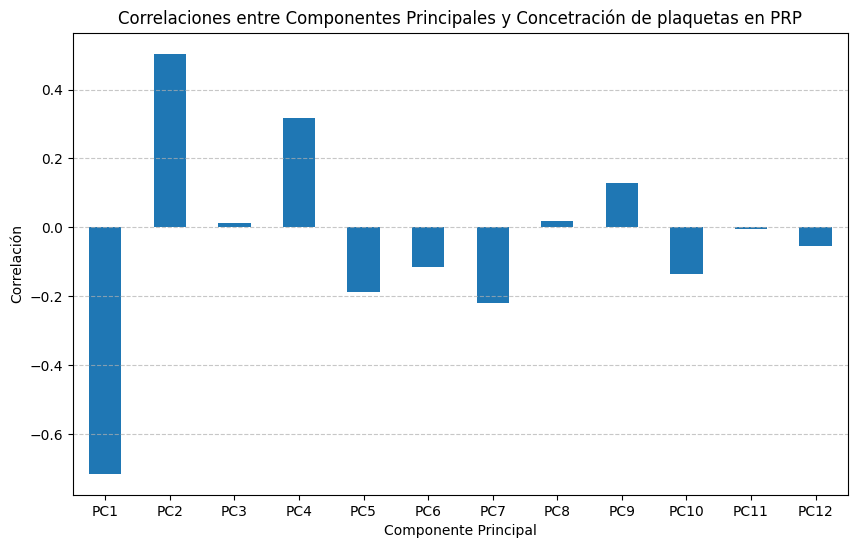

In [31]:
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlaciones entre Componentes Principales y Concetración de plaquetas en PRP')
plt.xlabel('Componente Principal')
plt.ylabel('Correlación')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

fijarse q onda los nombres de los comp principales

y algun plot de el comp princ vs conc. plt